In [1]:
# Probe & USGS Discharge Data
env_data_dir = "/Volumes/KeithSSD/ChesapeakeMicrobiome/data/environmental_raw_data"
env_data_file1 = paste(env_data_dir, "Transformed_WQVars_Hab_and_aDiv.txt", sep="/")
env_data_file2 = paste(env_data_dir, "merged_paired_water_quality_data.txt", sep="/")
env_data_1 <- read.delim(env_data_file1, row.names=1)
env_data_orig <- read.delim(env_data_file2, row.names=1)

extra_cols1 = c('ENSpie.1', 'FaithsPD.1', 'Observed.ASVs.1', 'Chao1', 'ACE',  'Observed.ASVs', 'qPCR.ct', 
                'Discharge_Susquehanna.15', 'SpringPeak', 'Station', 'ENSpie')
ENV.mini = env_data_1[,colnames(env_data_1)[which(!(colnames(env_data_1) %in% extra_cols1))]]

intcols = colnames(ENV.mini)[which(sapply(ENV.mini, class) == 'integer')]
for (ic in intcols)
    ENV.mini[,ic] = factor(ENV.mini[,ic])

colSums(is.na(ENV.mini))

PHEO                  TN                  TP                CHLA 
                  0                   0                   0                   0 
                DOP                 DON                NH4F                NO2F 
                  0                   0                   0                   0 
               NO3F                  PC                PO4F                  DO 
                  0                   0                   0                   0 
                 PH            SALINITY               WTEMP            Latitude 
                  0                   0                   0                   0 
            HABITAT WaterColumnPosition          LinearTime            FallPeak 
                  0                   0                   0                   0 
          cruise_id          SampleDate    Discharge_Sum.15            StatName 
                  0                   0                   0                   0 
         InvSimpson            FaithsPD 
                  0                   0

In [2]:
library(phyloseq)
#Taxonomy of each OTU
tax = read.delim("/Volumes/KeithSSD/ChesapeakeMicrobiome/data/otu_tables/taxa_table_with_OTUs.txt", row.names=1)
tax_mat = as.matrix(tax)
colnames(tax_mat)[1] <- 'Domain'
tax_mat[tax_mat == ""] <- NA

tree_file = "/Volumes/KeithSSD/ChesapeakeMicrobiome/data/phylogenetic_tree/RAxML_rootedTree.root.query_all_abund.2.ref.tre"
tree_obj = read_tree(tree_file, errorIfNULL=T)


In [3]:
#OTU table (shared file)
OTU1 = read.delim("../data/otu_tables/final_rare_no_abund_filt.2.txt", row.names=1)
OTU2 = read.delim("../data/otu_tables/final_rarefied_table.2.txt", row.names=1)

OTU.clean1 = OTU1[rownames(ENV.mini), ]
OTU.clean2 = OTU2[rownames(ENV.mini), ]

OTU.clean1.1 = as.matrix(OTU.clean1[,colSums(OTU.clean1) > 0])
OTU.clean2.1 = as.matrix(OTU.clean2[,colSums(OTU.clean2) > 0])

tax.clean1 = tax_mat[colnames(OTU.clean1.1), ]
tree.clean1 = prune_taxa(taxa=colnames(OTU.clean1.1), tree_obj)

tax.clean2 = tax_mat[colnames(OTU.clean2.1), ]
tree.clean2 = prune_taxa(taxa=colnames(OTU.clean2.1), tree_obj)

dim(OTU.clean1.1)
dim(tax.clean1)

dim(OTU.clean2.1)
dim(tax.clean2)

[1]   236 11450

[1] 11450     7

[1]  236 1416

[1] 1416    7

In [4]:
physeq_1 = phyloseq(otu_table(OTU.clean1.1, taxa_are_rows = FALSE), 
                    tax_table(tax.clean1), ENV.mini, tree.clean1)
physeq_1
physeq_2 = phyloseq(otu_table(OTU.clean2.1, taxa_are_rows = FALSE), 
                    tax_table(tax.clean2), ENV.mini, tree.clean2)
physeq_2

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 11450 taxa and 236 samples ]
tax_table()   Taxonomy Table:    [ 11450 taxa by 7 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 11450 tips and 11449 internal nodes ]

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 1416 taxa and 236 samples ]
tax_table()   Taxonomy Table:    [ 1416 taxa by 7 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 1416 tips and 1415 internal nodes ]

In [5]:
library(vegan)
wunifrac_dist1 = phyloseq::distance(physeq_1, method="unifrac", weighted=F)
wunifrac_dist2 = phyloseq::distance(physeq_2, method="unifrac", weighted=T)

Loading required package: permute
Loading required package: lattice
This is vegan 2.5-5


In [9]:
ENV.mini.2 <- subset(ENV.mini, select=-c(cruise_id, SampleDate, StatName, FaithsPD, InvSimpson))
dim(ENV.mini.2)

cap.env.mini <- capscale(wunifrac_dist1 ~ ., data=ENV.mini.2)
mod0.env.mini <- capscale(wunifrac_dist1 ~ 1, data=ENV.mini.2)
#step.env.mini <- ordiR2step(mod0.env.mini, scope=formula(cap.env.mini), direction ="forward", 
#                           permutations = how(nperm = 99), trace = TRUE, R2permutations = 299)


[1] 236  21

In [9]:
cap.env.mini.u <- capscale(wunifrac_dist2 ~ ., data=ENV.mini.2)
mod0.env.mini.u <- capscale(wunifrac_dist2 ~ 1, data=ENV.mini.2)
#step.env.mini.u <- ordiR2step(mod0.env.mini.u, scope=formula(cap.env.mini.u), direction ="forward", 
#                           permutations = how(nperm = 99), trace = TRUE, R2permutations = 299)


Step: R2.adj= 0 
Call: wunifrac_dist2 ~ 1 
 
                      R2.adjusted
<All variables>        0.66851560
+ WTEMP                0.19106323
+ Discharge_Sum.15     0.16954316
+ FallPeak             0.16728517
+ HABITAT              0.14410552
+ SALINITY             0.13554508
+ PO4F                 0.13493210
+ TP                   0.12043686
+ CHLA                 0.12016107
+ DO                   0.10281664
+ Latitude             0.09628142
+ WaterColumnPosition  0.09414568
+ TN                   0.08792037
+ PC                   0.08737027
+ DON                  0.07843200
+ PH                   0.07448909
+ NO2F                 0.07114396
+ DOP                  0.06663579
+ NH4F                 0.06518058
+ NO3F                 0.06488263
+ LinearTime           0.03431003
+ PHEO                 0.03197252
<none>                 0.00000000

        Df    AIC      F Pr(>F)   
+ WTEMP  1 653.74 49.526   0.01 **
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1




Partition of squared  distance in dbRDA 

Call: varpart(Y = wunifrac_dist2, X = ~WTEMP, ~SALINITY, ~HABITAT,
~LinearTime, data = ENV.mini)

Explanatory tables:
X1:  ~WTEMP
X2:  ~SALINITY
X3:  ~HABITAT
X4:  ~LinearTime 

No. of explanatory tables: 4 
Total variation (SS): 17.147 
No. of observations: 236 

Partition table:
                            Df R.square Adj.R.square Testable
[aeghklno] = X1              1  0.19444      0.19100     TRUE
[befiklmo] = X2              1  0.13915      0.13547     TRUE
[cfgjlmno] = X3              2  0.15083      0.14354     TRUE
[dhijkmno] = X4              1  0.03825      0.03414     TRUE
[abefghiklmno] = X1+X2       2  0.33608      0.33038     TRUE
[acefghjklmno] = X1+X3       3  0.35508      0.34674     TRUE
[adeghijklmno] = X1+X4       2  0.24320      0.23670     TRUE
[bcefgijklmno] = X2+X3       3  0.26658      0.25710     TRUE
[bdefhijklmno] = X2+X4       2  0.17321      0.16611     TRUE
[cdfghijklmno] = X3+X4       3  0.18004      0.16944   

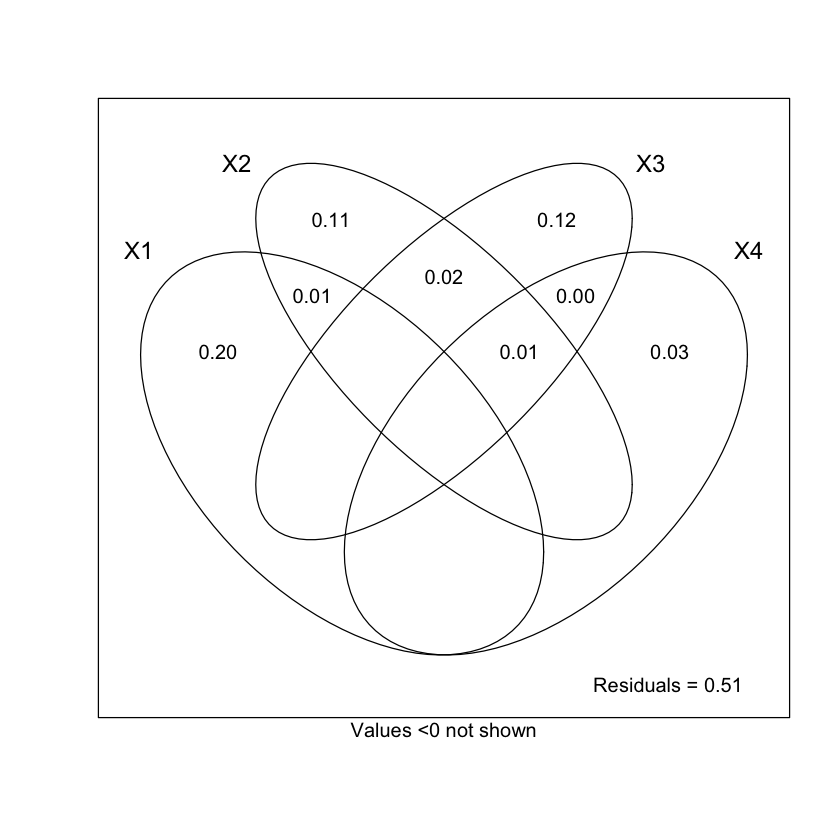

In [7]:
overview.vp <- varpart(wunifrac_dist2, 
                           ~ WTEMP,
                           ~ SALINITY,
                           ~ HABITAT,
                           ~ LinearTime, data=ENV.mini)
overview.vp
plot(overview.vp)

In [10]:
bc_opt_vars = c('FallPeak', 'SALINITY', 'HABITAT', 'Discharge_Sum.15', 'LinearTime', 'DO')
wuf_opt_vars = c('WTEMP', 'HABITAT', 'SALINITY', 'PO4F', 'LinearTime','DO', 'NO2F')

In [12]:
cons_ord_res = data.frame('wuf.adjr2'=c(), 'wuf.pval'=c(), 'wuf.constr'=c(), 
                          'bc.adjr2'=c(), 'bc.pval'=c(), 'bc.constr'=c())

cons_ord_res['full', 'bc.adjr2']  <- RsquareAdj(cap.env.mini)$adj.r.squared
cons_ord_res['full', 'bc.pval']  <- anova(cap.env.mini)["Pr(>F)"]['Model',]
cons_ord_res['full', 'bc.constr']  <- summary(cap.env.mini)$constr.chi/summary(cap.env.mini)$tot.chi

for (ind_var in bc_opt_vars){
    cap.env.ind <- capscale(wunifrac_dist1 ~ ENV.mini.2[,ind_var], distance='bray')
    cons_ord_res[ind_var, 'bc.adjr2'] = RsquareAdj(cap.env.ind)$adj.r.squared
    cons_ord_res[ind_var, 'bc.pval'] = anova(cap.env.ind)["Pr(>F)"]['Model',]
    cons_ord_res[ind_var, 'bc.constr']  <- summary(cap.env.ind)$constr.chi/summary(cap.env.ind)$tot.chi
}

cap.env.mini.opt <- capscale(wunifrac_dist1 ~., data=ENV.mini.2[,bc_opt_vars], distance='bray')
cons_ord_res['best', 'bc.adjr2']  <- RsquareAdj(cap.env.mini.opt)$adj.r.squared
cons_ord_res['best', 'bc.pval']  <- anova(cap.env.mini.opt)["Pr(>F)"]['Model',]
cons_ord_res['best', 'bc.constr']  <- summary(cap.env.mini.opt)$constr.chi/summary(cap.env.mini.opt)$tot.chi

cons_ord_res['full', 'wuf.adjr2']  <- RsquareAdj(cap.env.mini.u)$adj.r.squared
cons_ord_res['full', 'wuf.pval']  <- anova(cap.env.mini.u)["Pr(>F)"]['Model',]
cons_ord_res['full', 'wuf.constr']  <- summary(cap.env.mini.u)$constr.chi/summary(cap.env.mini.u)$tot.chi

for (ind_var in wuf_opt_vars){
    cap.env.ind <- capscale(wunifrac_dist2 ~ ENV.mini.2[,ind_var])
    cons_ord_res[ind_var, 'wuf.adjr2'] = RsquareAdj(cap.env.ind)$adj.r.squared
    cons_ord_res[ind_var, 'wuf.pval'] = anova(cap.env.ind)["Pr(>F)"]['Model',]
    cons_ord_res[ind_var, 'wuf.constr']  <- summary(cap.env.ind)$constr.chi/summary(cap.env.ind)$tot.chi
}

cap.env.mini.opt <- capscale(wunifrac_dist2 ~., data=ENV.mini.2[,wuf_opt_vars])
cons_ord_res['best', 'wuf.adjr2']  <- RsquareAdj(cap.env.mini.opt)$adj.r.squared
cons_ord_res['best', 'wuf.pval']  <- anova(cap.env.mini.opt)["Pr(>F)"]['Model',]
cons_ord_res['best', 'wuf.constr']  <- summary(cap.env.mini.opt)$constr.chi/summary(cap.env.mini.opt)$tot.chi


In [72]:
all_opt = unique(c(bc_opt_vars, wuf_opt_vars))
round(cons_ord_res[c(all_opt, 'best', 'full'),], 3)

,bc.adjr2,bc.pval,bc.constr,wuf.adjr2,wuf.pval,wuf.constr
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
FallPeak,0.107,0.001,0.111,NA,NA,NA
SALINITY,0.055,0.001,0.059,0.136,0.001,0.125
HABITAT,0.074,0.001,0.081,0.144,0.001,0.136
Discharge_Sum.15,0.099,0.001,0.103,NA,NA,NA
LinearTime,0.021,0.001,0.025,0.034,0.001,0.035
DO,0.051,0.001,0.055,0.103,0.001,0.096
WTEMP,NA,NA,NA,0.191,0.001,0.175
PO4F,NA,NA,NA,0.135,0.001,0.124
NO2F,NA,NA,NA,0.071,0.001,0.067



Partition of squared  distance in dbRDA 

Call: varpart(Y = wunifrac_dist2, X = ~WTEMP + SALINITY + LinearTime,
~DO, ~NO2F, ~PO4F, data = ENV.mini)

Explanatory tables:
X1:  ~WTEMP + SALINITY + LinearTime
X2:  ~DO
X3:  ~NO2F
X4:  ~PO4F 

No. of explanatory tables: 4 
Total variation (SS): 17.147 
No. of observations: 236 

Partition table:
                            Df R.square Adj.R.square Testable
[aeghklno] = X1              3  0.37595      0.36789     TRUE
[befiklmo] = X2              1  0.10652      0.10271     TRUE
[cfgjlmno] = X3              1  0.07466      0.07070     TRUE
[dhijkmno] = X4              1  0.13835      0.13467     TRUE
[abefghiklmno] = X1+X2       4  0.46793      0.45871     TRUE
[acefghjklmno] = X1+X3       4  0.44555      0.43594     TRUE
[adeghijklmno] = X1+X4       4  0.50168      0.49305     TRUE
[bcefgijklmno] = X2+X3       2  0.14695      0.13963     TRUE
[bdefhijklmno] = X2+X4       2  0.16739      0.16024     TRUE
[cdfghijklmno] = X3+X4       2  0.169

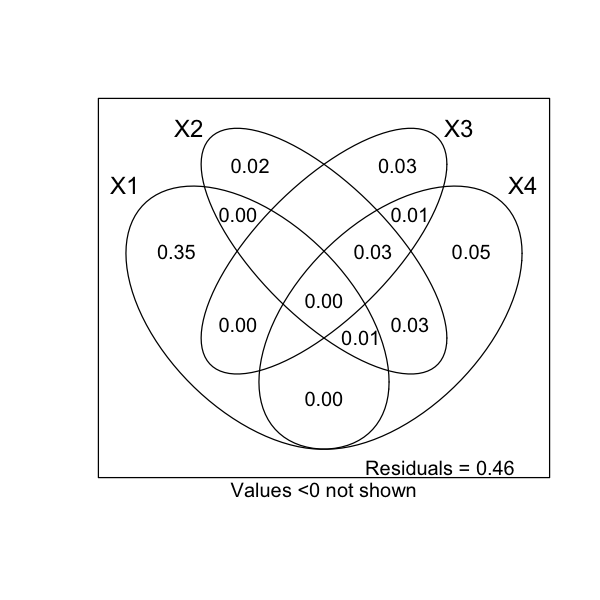

In [15]:
options(repr.plot.width=5, repr.plot.height=5)

cb.varpart.mini <- varpart(wunifrac_dist2, 
                           ~ WTEMP + SALINITY + LinearTime,
                           ~ DO,
                           ~ NO2F,
                           ~ PO4F, data=ENV.mini)
cb.varpart.mini
plot(cb.varpart.mini)
flush.console()


Run 0 stress 0.1017618 
Run 1 stress 0.1017613 
... New best solution
... Procrustes: rmse 0.0003513279  max resid 0.002714533 
... Similar to previous best
Run 2 stress 0.1017612 
... New best solution
... Procrustes: rmse 0.000298511  max resid 0.002572499 
... Similar to previous best
Run 3 stress 0.101778 
... Procrustes: rmse 0.006203495  max resid 0.09183255 
Run 4 stress 0.1017657 
... Procrustes: rmse 0.000455199  max resid 0.004522679 
... Similar to previous best
Run 5 stress 0.1230606 
Run 6 stress 0.1029371 
Run 7 stress 0.1029398 
Run 8 stress 0.1029307 
Run 9 stress 0.101764 
... Procrustes: rmse 0.0005493917  max resid 0.005199327 
... Similar to previous best
Run 10 stress 0.1023482 
Run 11 stress 0.1023526 
Run 12 stress 0.101783 
... Procrustes: rmse 0.006163077  max resid 0.09179888 
Run 13 stress 0.1114903 
Run 14 stress 0.1017626 
... Procrustes: rmse 0.000409797  max resid 0.004039632 
... Similar to previous best
Run 15 stress 0.1029305 
Run 16 stress 0.1029404 


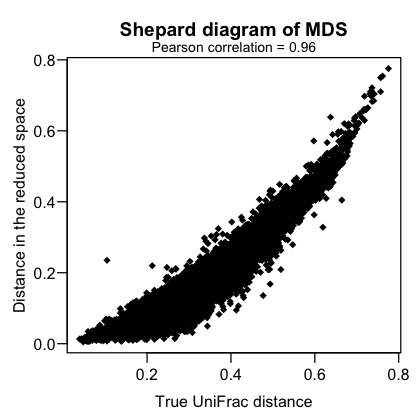

In [19]:
set.seed(100)
wUF.nmds.3D = metaMDS(wunifrac_dist2, method="NMDS", k=3, trymax=1000, trace=1)

options(repr.plot.width=3.5, repr.plot.height=3.5)
par(mfrow = c(1,1), mar = c(3.5,3.5,3,1), mgp = c(2, 0.6, 0), cex = 0.8, las = 1)
pears <- round(cor(wunifrac_dist2, dist(wUF.nmds.3D$points), method = "pearson"),3)
plot(wunifrac_dist2, dist(wUF.nmds.3D$points), main = "Shepard diagram of MDS", 
     xlab = "True UniFrac distance", ylab = "Distance in the reduced space", pch=18)
mtext(line = 0.1, text = paste0("Pearson correlation = ", pears), cex = 0.7)


1-Dim      2-Dim      3-Dim      4-Dim      5-Dim      6-Dim      7-Dim 
0.34435532 0.16442537 0.10175941 0.07514798 0.05814742 0.04472846 0.03697089

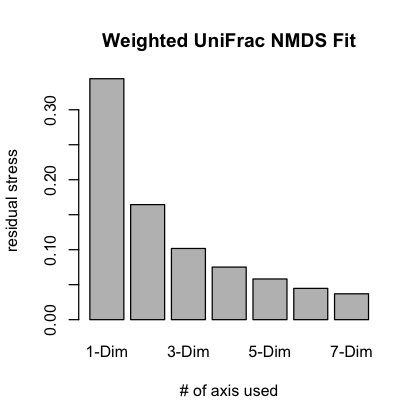

In [21]:
n = 7
stress <- rep(0, n)
for (i in 1:n) {
    stress[i] <- metaMDS(wunifrac_dist2, trymax=1000, k = i, trace=0)$stress
}
names(stress) <- paste(1:n, "Dim", sep="-")
stress
par(cex=0.8)
barplot(stress, ylab = "residual stress", xlab='# of axis used')
title('Weighted UniFrac NMDS Fit')

In [34]:
set.seed(100)
wUF.nmds.6D = metaMDS(wunifrac_dist2, method="NMDS", k=6, trymax=1000, trace=0)
wUNFuvwxyz = scores(wUF.nmds.6D, display="sites")

library(NbClust)

number <- NbClust(wUNFuvwxyz, distance="euclidean", min.nc=2, max.nc=25, method='ward.D2', index='all')

print(colnames(number[['Best.nc']])[which(number[['Best.nc']]['Number_clusters',]  == 3.)])

library(cluster)
pam.res <- pam(wUNFuvwxyz, 3, diss=FALSE, metric='euclidean')

[1] "Hartigan" "Scott"    "Marriot"  "TrCovW"   "TraceW"   "Friedman" "Ball"    


In [75]:
library(caret)

str(ENV.mini.2$HABITAT)
ENV.mini.2$habitat2 = factor(paste("H", as.character(ENV.mini.2$HABITAT), sep="."), 
                             levels=c('H.3','H.2','H.1'))

ENV.mini.2$mclusts = factor(paste("M", pam.res$clustering, sep="."))

confusionMatrix(factor(as.integer(ENV.mini.2$habitat2)), factor(as.integer(ENV.mini.2$mclusts)))

 Factor w/ 3 levels "1","2","3": 1 2 2 2 2 2 2 2 2 2 ...


Confusion Matrix and Statistics

          Reference
Prediction  1  2  3
         1 43 33  1
         2 10 11 39
         3 19 21 59

Overall Statistics
                                          
               Accuracy : 0.4788          
                 95% CI : (0.4136, 0.5446)
    No Information Rate : 0.4195          
    P-Value [Acc > NIR] : 0.03798         
                                          
                  Kappa : 0.2036          
                                          
 Mcnemar's Test P-Value : 2.078e-07       

Statistics by Class:

                     Class: 1 Class: 2 Class: 3
Sensitivity            0.5972  0.16923   0.5960
Specificity            0.7927  0.71345   0.7080
Pos Pred Value         0.5584  0.18333   0.5960
Neg Pred Value         0.8176  0.69318   0.7080
Prevalence             0.3051  0.27542   0.4195
Detection Rate         0.1822  0.04661   0.2500
Detection Prevalence   0.3263  0.25424   0.4195
Balanced Accuracy      0.6950  0.44134   0.6520

In [117]:
library(readr)
library(tidyverse)
# set up abundace tables
taxa_abund = round(t(read.delim("../data/otu_tables/taxa_family_abundances.txt", sep="\t", row.names=1)))
fxn_abund = round(t(read.delim("../data/faprotax_data/function_abundances.txt", sep="\t", row.names=1)))
# set up metadata
ENV.mini.ancom = ENV.mini.2[,c('habitat2', 'mclusts')]
ENV.mini.ancom[,'Sample.ID'] <- rownames(ENV.mini.2)

In [150]:
sample_var = "Sample.ID"; group_var = NULL; out_cut = 0.05; zero_cut = 0.90; lib_cut = 0; neg_lb = FALSE

paste('taxa table before:', dim(taxa_abund))
prepro_ta = feature_table_pre_process(taxa_abund, ENV.mini.ancom, sample_var, group_var, 
                                      out_cut, zero_cut, lib_cut, neg_lb)
paste('taxa table after:', dim(prepro_ta$feature_table))

paste('fxn table before:', dim(fxn_abund))
prepro_fa = feature_table_pre_process(fxn_abund, ENV.mini.ancom, sample_var, group_var, 
                                      out_cut, zero_cut, lib_cut, neg_lb)
paste('fxn table after:', dim(prepro_fa$feature_table))

[1] "taxa table before: 477" "taxa table before: 236"

[1] "taxa table after: 264" "taxa table after: 236"

[1] "fxn table before: 91"  "fxn table before: 236"

[1] "fxn table after: 58"  "fxn table after: 236"

In [151]:
main_var = "mclusts"; p_adj_method = "BH"; alpha = 0.001; rand_formula = NULL

adj_formula = NULL
t_start = Sys.time()
res_ta_standard = ANCOM(prepro_ta$feature_table, prepro_ta$meta_data, prepro_ta$structure_zeros, 
                        main_var, p_adj_method, alpha, adj_formula, rand_formula)
t_end = Sys.time()
t_end - t_start # around 30s
rownames(res_ta_standard[['out']])[which(res_ta_standard[['out']][,'detected_0.7'] == T)]

adj_formula = "habitat2"
t_start = Sys.time()
res_ta_covariate = ANCOM(prepro_ta$feature_table, prepro_ta$meta_data, prepro_ta$structure_zeros, 
                         main_var, p_adj_method, alpha, adj_formula, rand_formula)
t_end = Sys.time()
t_end - t_start
rownames(res_ta_covariate[['out']])[which(res_ta_covariate[['out']][,'detected_0.7'] == T)]



Time difference of 2.211874 mins

[1] "1"   "3"   "5"   "6"   "7"   "8"   "9"   "10"  "11"  "14"  "15"  "17" 
 [13] "19"  "20"  "21"  "22"  "23"  "26"  "30"  "32"  "33"  "34"  "35"  "37" 
 [25] "39"  "41"  "42"  "44"  "45"  "46"  "47"  "48"  "49"  "50"  "51"  "54" 
 [37] "56"  "57"  "58"  "59"  "60"  "61"  "63"  "64"  "66"  "67"  "68"  "69" 
 [49] "71"  "73"  "74"  "76"  "79"  "81"  "83"  "84"  "85"  "87"  "89"  "90" 
 [61] "92"  "93"  "95"  "97"  "99"  "100" "102" "103" "104" "109" "110" "113"
 [73] "114" "115" "116" "117" "119" "123" "125" "128" "130" "132" "134" "135"
 [85] "136" "138" "139" "140" "141" "142" "143" "145" "147" "148" "149" "151"
 [97] "153" "155" "158" "159" "161" "165" "166" "167" "168" "169" "170" "172"
[109] "175" "177" "178" "180" "182" "183" "185" "188" "189" "190" "191" "196"
[121] "198" "199" "201" "206" "208" "209" "211" "213" "217" "218" "220" "224"
[133] "225" "232" "237" "242" "243" "246" "247" "251" "252" "255" "259" "260"
[145] "261" "262" "263"

Time difference of 1.884961 mins

[1] "1"   "3"   "5"   "6"   "7"   "8"   "9"   "10"  "11"  "14"  "15"  "17" 
 [13] "18"  "19"  "20"  "22"  "23"  "25"  "26"  "30"  "31"  "33"  "34"  "35" 
 [25] "37"  "39"  "41"  "42"  "44"  "45"  "46"  "47"  "48"  "49"  "50"  "51" 
 [37] "53"  "54"  "56"  "57"  "58"  "59"  "60"  "61"  "63"  "64"  "66"  "67" 
 [49] "68"  "69"  "71"  "73"  "74"  "76"  "79"  "80"  "81"  "83"  "84"  "85" 
 [61] "89"  "90"  "92"  "93"  "95"  "97"  "98"  "99"  "100" "102" "103" "104"
 [73] "109" "110" "113" "114" "115" "116" "117" "119" "123" "125" "128" "130"
 [85] "132" "134" "135" "136" "138" "139" "140" "142" "143" "145" "147" "148"
 [97] "149" "151" "153" "155" "158" "159" "161" "165" "166" "167" "168" "169"
[109] "170" "172" "175" "177" "178" "180" "182" "183" "185" "188" "189" "190"
[121] "191" "196" "199" "201" "206" "208" "209" "211" "213" "214" "217" "218"
[133] "220" "224" "225" "227" "232" "237" "242" "246" "247" "251" "252" "254"
[145] "255" "259" "260" "261" "262" "263"

In [152]:
alpha = 0.001;
adj_formula = NULL
t_start = Sys.time()
res_fa_standard = ANCOM(prepro_fa$feature_table, prepro_fa$meta_data, prepro_fa$structure_zeros, 
                        main_var, p_adj_method, alpha, adj_formula, rand_formula)
t_end = Sys.time()
t_end - t_start # around 30s
rownames(res_fa_standard[['out']])[which(res_fa_standard[['out']][,'detected_0.7'] == T)]

adj_formula = "habitat2"
t_start = Sys.time()
res_fa_covariate = ANCOM(prepro_fa$feature_table, prepro_fa$meta_data, prepro_fa$structure_zeros, 
                         main_var, p_adj_method, alpha, adj_formula, rand_formula)
t_end = Sys.time()
t_end - t_start
rownames(res_fa_covariate[['out']])[which(res_fa_covariate[['out']][,'detected_0.7'] == T)]
head(res_fa_covariate[['out']])

Time difference of 5.847831 secs

[1] "8"  "10" "11" "14" "16" "23" "24" "26" "27" "28" "29" "30" "31" "32" "33"
[16] "37" "38" "39" "40" "41" "43" "44" "45" "47" "49" "51" "52" "54" "56" "58"

Time difference of 6.227784 secs

[1] "6"  "8"  "10" "11" "13" "14" "16" "23" "24" "26" "27" "28" "29" "30" "32"
[16] "33" "37" "38" "39" "40" "43" "44" "45" "47" "49" "51" "52" "54" "56" "58"

taxa_id,W,detected_0.9,detected_0.8,detected_0.7,detected_0.6
<fct>,<int>,<lgl>,<lgl>,<lgl>,<lgl>
methanotrophy,36,FALSE,FALSE,FALSE,TRUE
acetoclastic_methanogenesis,34,FALSE,FALSE,FALSE,FALSE
methanogenesis_by_CO2_reduction_with_H2,34,FALSE,FALSE,FALSE,FALSE
hydrogenotrophic_methanogenesis,34,FALSE,FALSE,FALSE,FALSE
methanogenesis,32,FALSE,FALSE,FALSE,FALSE
methanol_oxidation,42,FALSE,FALSE,TRUE,TRUE


In [248]:
minmax_scale <- function(x) {(x- min(x, na.rm=T)) /(max(x, na.rm=T)-min(x, na.rm=T))}

# package necessary items for summary
enrichment_pile = list('function' = list('abunds'=prepro_fa$feature_table,
                                         'meta'=prepro_fa$meta_data,
                                         'std'=res_fa_standard[['out']], 
                                         'adj'=res_fa_covariate[['out']]),
                           'taxa' = list('abunds'=prepro_ta$feature_table,
                                         'meta'=prepro_ta$meta_data,
                                         'std'=res_ta_standard[['out']], 
                                         'adj'=res_ta_covariate[['out']]))
# iterate over function and taxa
for (abund_type in names(enrichment_pile)) {
    # take the top scores from the standard 
    std_i = enrichment_pile[[abund_type]][['std']]
    std_i_srt = std_i[order(std_i[,'W'], decreasing=T),]
    std_i_sig = std_i_srt[which(std_i_srt[,'detected_0.7'] == T),]
    std_top_scores = std_i_sig[1:min(c(20, nrow(std_i_sig))), c('taxa_id', 'W')]
    colnames(std_top_scores) <- c('taxa_id', 'W.standard')
    # take the top adjusted scores 
    adj_i = enrichment_pile[[abund_type]][['adj']]
    adj_i_srt = adj_i[order(adj_i[,'W'], decreasing=T),]
    adj_i_sig = adj_i_srt[which(adj_i_srt[,'detected_0.7'] == T),]
    adj_top_scores = adj_i_sig[1:min(c(20, nrow(adj_i_sig))), c('taxa_id', 'W')]
    colnames(adj_top_scores) <- c('taxa_id', 'W.adjusted')
    # take the intersection of the top 20 from both standard and adjusted and pick the top ten 
    #top_scores = merge(std_top_scores, adj_top_scores, all.x=T, all.y=T)
    top_scores = std_top_scores
    top_scores = top_scores[complete.cases(top_scores),]
    top_scores = top_scores[order(top_scores$W.standard, decreasing=T),]
    top_scores = top_scores[1:20,]
    # make the rownames match the abundace table 
    rownames(top_scores) <- top_scores[,'taxa_id']
    top_scores[,'taxa_id'] <- NULL
    # pull out preprocessed metadta and abundances
    ft_i = enrichment_pile[[abund_type]][['abunds']]
    ft_i = ft_i / rowSums(ft_i)
    md_i = enrichment_pile[[abund_type]][['meta']]

    # get aggregate abundances per cluster level
    for (lev in levels(md_i[,'mclusts'])){
        samps_i = md_i[which(md_i[,'mclusts'] == lev), 'Sample.ID']
        aggd_abunds_i = rowMeans(ft_i[rownames(top_scores), samps_i])
        newName = as.character(lev)
        top_scores = cbind.data.frame(top_scores,
                                       data.frame(newName = aggd_abunds_i))
        colnames(top_scores)[colnames(top_scores) == 'newName'] = newName
    }
    # score 
    enrichment_pile[[abund_type]][['summary']] = top_scores
}

In [263]:
aerobic_proc = c('aerobic_ammonia_oxidation', 'aerobic_anoxygenic_phototrophy', 'aerobic_chemoheterotrophy', 
                 'aerobic_nitrite_oxidation', 'knallgas_bacteria', 'nitrification', 'oxygenic_photoautotrophy')

anaerobic_proc = c("acetoclastic_methanogenesis", "anammox", "arsenate_respiration", "dark_sulfite_oxidation", 
                   "denitrification", "fermentation", "fumarate_respiration", "hydrogenotrophic_methanogenesis", 
                   "iron_respiration", "manganese_respiration", "methanogenesis", 
                   "methanogenesis_by_CO2_reduction_with_H2", "methanogenesis_by_disproportionation_of_methyl_groups",
                   "methanogenesis_by_reduction_of_methyl_compounds_with_H2", "methanogenesis_using_formate", 
                   "nitrate_ammonification", "nitrate_denitrification", "nitrate_respiration", 
                   "nitrite_ammonification", "nitrite_denitrification", "nitrite_respiration", 
                   "nitrogen_respiration", "nitrous_oxide_denitrification", "reductive_acetogenesis", 
                   "respiration_of_sulfur_compounds", 'sulfate_respiration', "sulfite_respiration", 
                   'sulfur_respiration', "thiosulfate_respiration")



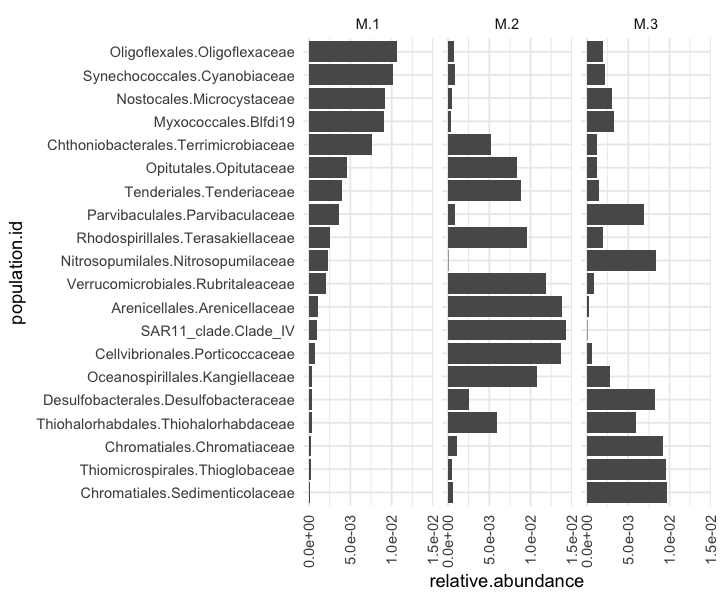

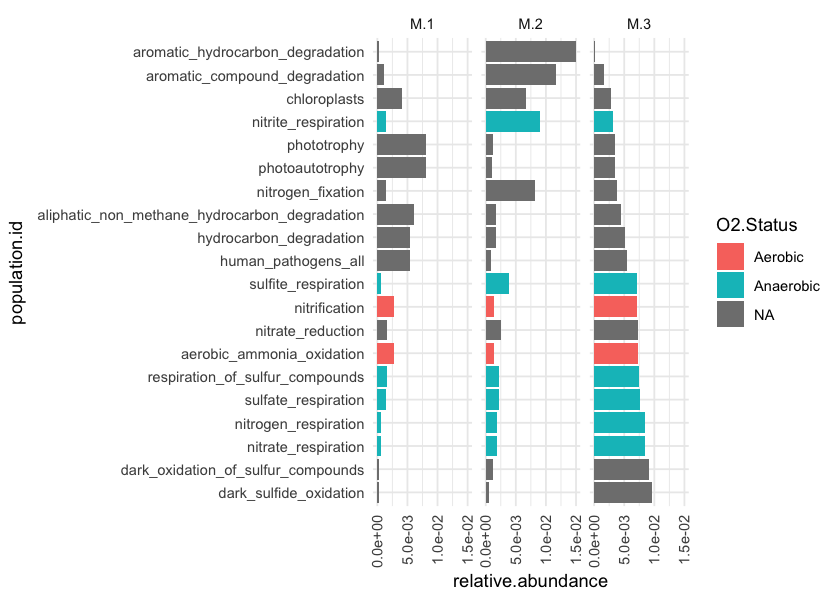

In [264]:
library(dplyr)
library(reshape2)
fxn_sum = cbind(enrichment_pile[['function']][['summary']])
fxn_sum[,'population.id'] <- rownames(fxn_sum)
fxn_order = fxn_sum[order(fxn_sum[,'M.3'], decreasing=T) ,'population.id']
fxn_sum[,'population.id'] <- factor(fxn_sum[,'population.id'], levels=fxn_order)

fxn_sum <- melt(fxn_sum, id.vars='population.id', measure.vars=c('M.1', 'M.2', 'M.3'),  
                value.name='relative.abundance', variable.name='community.cluster')
fxn_sum[,'data.type'] <- rep('Function', nrow(fxn_sum))
fxn_sum[,'O2.Status'] <- NA
fxn_sum[which(fxn_sum$population.id %in% aerobic_proc),'O2.Status'] = 'Aerobic'
fxn_sum[which(fxn_sum$population.id %in% anaerobic_proc),'O2.Status'] = 'Anaerobic'
fxn_sum[,'O2.Status'] <- factor(fxn_sum[,'O2.Status'])

tax_sum = enrichment_pile[['taxa']][['summary']]
tax_sum[,'population.id'] <- rownames(tax_sum)
tax_order = tax_sum[order(tax_sum[,'M.1'], decreasing=F) ,'population.id']
tax_sum[,'population.id'] <- factor(tax_sum[,'population.id'], levels=tax_order)

tax_sum <- melt(tax_sum, id.vars='population.id', measure.vars=c('M.1', 'M.2', 'M.3'),  
                value.name='relative.abundance', variable.name='community.cluster')
tax_sum[,'data.type'] <- rep('Taxa', nrow(tax_sum))

options(repr.plot.width=6, repr.plot.height=5)

p <-ggplot(tax_sum, aes(x=population.id, y=relative.abundance)) + 
    geom_bar(stat="identity") + theme_minimal() + coord_flip() + 
    scale_y_continuous(labels = function(x) {format(x, scientific = TRUE)}) + 
    theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1))
                       
p + facet_grid(. ~ community.cluster)

options(repr.plot.width=7, repr.plot.height=5)
p <-ggplot(fxn_sum, aes(x=population.id, y=relative.abundance, fill=O2.Status)) + 
    geom_bar(stat="identity") + theme_minimal() + coord_flip() + 
    scale_y_continuous(labels = function(x) {format(x, scientific = TRUE)}) + 
    theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1))
                       
p + facet_grid(. ~ community.cluster)

,W.standard,W.adjusted,M.1,M.2,M.3
,<int>,<int>,<dbl>,<dbl>,<dbl>
aerobic_ammonia_oxidation,49,NA,0.074090220,0.037028692,0.199286169
aliphatic_non_methane_hydrocarbon_degradation,56,56,0.405012024,0.110346209,0.297438144
aromatic_compound_degradation,50,52,0.014021219,0.148985154,0.021173445
aromatic_hydrocarbon_degradation,50,51,0.003350063,0.213487913,0.001234769
dark_oxidation_of_sulfur_compounds,55,52,0.006611014,0.025234213,0.184131270
dark_sulfide_oxidation,57,57,0.004116740,0.008830130,0.175824325
human_pathogens_all,55,54,0.049293710,0.008019201,0.049845535
hydrocarbon_degradation,56,56,0.369794812,0.114481993,0.349096953
nitrogen_fixation,NA,49,0.017784974,0.106381074,0.049006041


In [174]:
ENV.mini.manova = cbind(env_data_orig[,c('WaterColumnPosition', 'TN', 'CHLA', 'DO', 'WTEMP', 'SALINITY')])
ENV.mini.manova[,'SurfaceSample'] <- as.integer(ENV.mini.manova[,'WaterColumnPosition']) - 1
ENV.mini.manova[,'WaterColumnPosition'] <- NULL
num_cols = c('TN', 'CHLA', 'DO', 'WTEMP', 'SALINITY')

ENV.mini.manova[,num_cols] <- apply(ENV.mini.manova[,num_cols], 2, minmax_scale)
ENV.by.level =  list()
for (lev in levels(ENV.mini.ancom[,'mclusts'])){
    samps_i = rownames(ENV.mini.ancom)[which(ENV.mini.ancom[,'mclusts'] == lev)]
    aggd_abunds_i = colMeans(ENV.mini.manova[samps_i,], na.rm=T)
    ENV.by.level[[lev]] = aggd_abunds_i
}
ENV.by.level
#Y <- cbind(y1,y2,y3)
#fit <- manova(Y ~ A*B)

$M.1
           TN          CHLA            DO         WTEMP      SALINITY 
    0.2590003     0.1746971     0.5371613     0.8038170     0.4604434 
SurfaceSample 
    0.5972222 

$M.2
           TN          CHLA            DO         WTEMP      SALINITY 
    0.2437519     0.1011774     0.5468831     0.3648470     0.6020462 
SurfaceSample 
    0.2615385 

$M.3
           TN          CHLA            DO         WTEMP      SALINITY 
   0.23895305    0.03948317    0.22060867    0.81073786    0.68327685 
SurfaceSample 
   0.01010101

In [73]:
wuf_opt_vars1 = c('PO4F', 'DO', 'NO2F', 'WTEMP', 'SALINITY')
wuf_opt_vars2 = c('WTEMP', 'SALINITY', 'PO4F', 'DO', 'LinearTime', 'NO2F', 'HABITAT')
wuf_opt_vars3 = c('WTEMP', 'SALINITY', 'PO4F', 'DO', 'LinearTime', 'NO2F')

ENV.mini.3 = ENV.mini.2[,all_opt]

fit.swUF = envfit(wUF.nmds.3D, ENV.mini[,  wuf_opt_vars1])
fit.swUF
fit.swUF2 = envfit(wUF.nmds.3D, ENV.mini[, wuf_opt_vars], choices=c(3,2))
fit.swUF2
fit.swUF3 = envfit(wUF.nmds.3D, ENV.mini[, wuf_opt_vars3], choices=c(1,3))
fit.swUF3


***VECTORS

            NMDS1    NMDS2     r2 Pr(>r)    
PO4F      0.10021 -0.99497 0.6109  0.001 ***
DO       -0.14136  0.98996 0.4089  0.001 ***
NO2F     -0.06103  0.99814 0.2068  0.001 ***
WTEMP    -0.69443 -0.71956 0.7156  0.001 ***
SALINITY  0.99537  0.09607 0.1174  0.001 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
Permutation: free
Number of permutations: 999




***VECTORS

              NMDS3    NMDS2     r2 Pr(>r)    
WTEMP      -0.47579 -0.87956 0.3607  0.001 ***
SALINITY   -0.99961  0.02790 0.6555  0.001 ***
PO4F       -0.04992 -0.99875 0.6028  0.001 ***
LinearTime  0.98755  0.15732 0.0290  0.030 *  
DO          0.18327  0.98306 0.4065  0.001 ***
NO2F       -0.47238  0.88139 0.2471  0.001 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
Permutation: free
Number of permutations: 999

***FACTORS:

Centroids:
           NMDS3   NMDS2
HABITAT1  0.0338 -0.0573
HABITAT2 -0.0511  0.0122
HABITAT3 -0.0036  0.0642

Goodness of fit:
            r2 Pr(>r)    
HABITAT 0.2861  0.001 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
Permutation: free
Number of permutations: 999




***VECTORS

              NMDS1    NMDS3     r2 Pr(>r)    
WTEMP      -0.87231 -0.48895 0.4778  0.001 ***
SALINITY    0.27782 -0.96063 0.7714  0.001 ***
PO4F        0.89576 -0.44453 0.0102  0.300    
DO         -0.60808  0.79388 0.0218  0.093 .  
LinearTime -0.27722  0.96081 0.0330  0.023 *  
NO2F       -0.11336 -0.99355 0.0426  0.007 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
Permutation: free
Number of permutations: 999



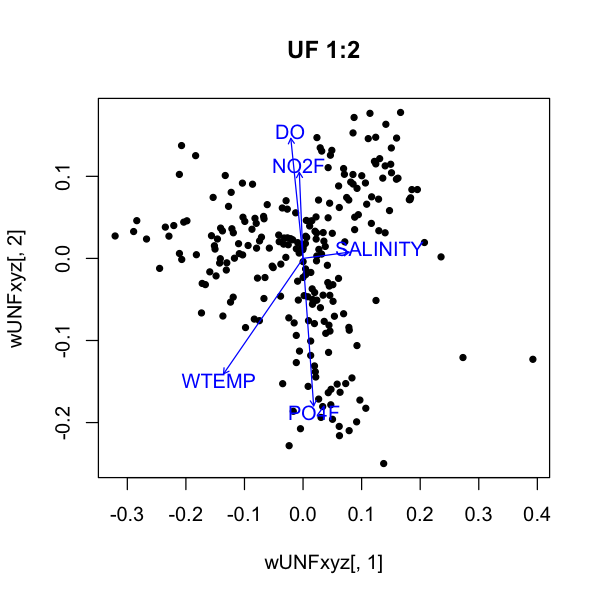

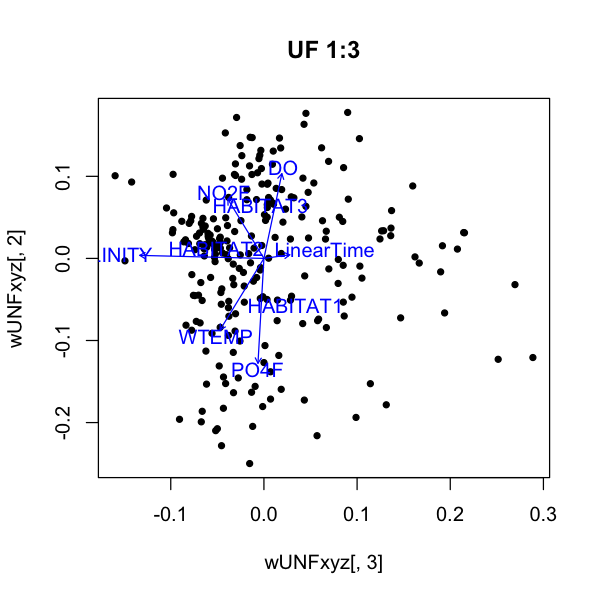

In [74]:
options(repr.plot.width=5, repr.plot.height=5)
wUNFxyz = scores(wUF.nmds.3D, display="sites")

plot(wUNFxyz[,1], wUNFxyz[,2], main="UF 1:2", pch=20)
plot(fit.swUF, add=T)
plot(wUNFxyz[,3], wUNFxyz[,2], main="UF 1:3", pch=20)
plot(fit.swUF2, add=T)

NMDS1     NMDS2     NMDS3   Habitat  Salinity      Temp 
"numeric" "numeric" "numeric"  "factor" "numeric" "numeric"

,NMDS1,NMDS2
PO4F,-0.16219387,0.3611344
DO,0.12265186,-0.3203360
NO2F,0.04941022,-0.2192787


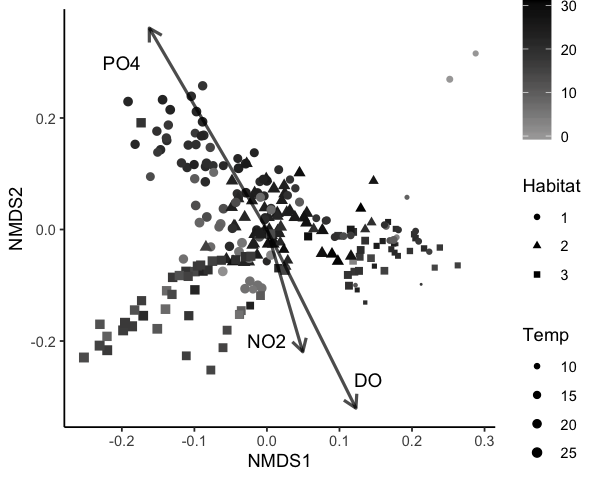

In [32]:
library(ggplot2)

mini.vectors.12 = c('PO4F', 'DO', 'NO2F')
mini.aes1 = c('HABITAT')
mini.aes2 = c('SALINITY', 'WTEMP')
plot.df.mini = cbind.data.frame(wUNFxyz, ENV.mini[,mini.aes1], env_data_orig[,mini.aes2])
colnames(plot.df.mini) <- c('NMDS1', 'NMDS2', 'NMDS3', 'Habitat', 'Salinity', 'Temp')
sapply(plot.df.mini, class)

spp.scrs <- as.data.frame(scores(fit.swUF, display = "vectors"))
spp.scrs <- apply(spp.scrs, MARGIN=2, FUN=function(x) {x*0.5})
spp.scrs

options(repr.plot.width=5, repr.plot.height=4)
sp2<-ggplot(plot.df.mini, aes(x=NMDS1, y=NMDS2)) + 
              geom_point(aes(color=Salinity, size=Temp, shape=Habitat)) + 
              scale_colour_gradient(low = "#A8A7A7", high = "#000000") + theme_classic() + 
              scale_size(range = c(0.5, 2.5))  + 
             annotate("segment", x = 0, xend = spp.scrs[,'NMDS1'],y = 0, yend = spp.scrs[,'NMDS2'], alpha=0.7,
                      colour = "black", size=0.9, arrow=arrow(length = unit(0.12, "inches")))  + 
              annotate('text', 
                        x= c(0.14, -0.2, 0), 
                        y= c(-0.27, 0.3, -0.2), 
                        label=c('DO', 'PO4', 'NO2'),
                        color='black', alpha=1.0, size=4)
sp2



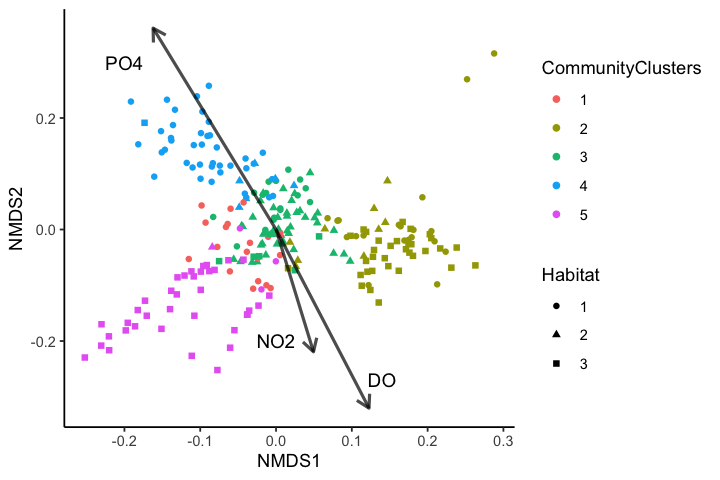

In [39]:
options(repr.plot.width=6, repr.plot.height=4)
plot.df.mini.2 = cbind.data.frame(plot.df.mini, pam.res$clustering)
colnames(plot.df.mini.2) <- c(colnames(plot.df.mini), 'CommunityClusters')
plot.df.mini.2$CommunityClusters <- factor(plot.df.mini.2$CommunityClusters)

sp22 <-ggplot(plot.df.mini.2, aes(x=NMDS1, y=NMDS2)) + 
              geom_point(aes(color=CommunityClusters, shape=Habitat)) + theme_classic() + 
              scale_size(range = c(0.7, 2.5))  + 
             annotate("segment", x = 0, xend = spp.scrs[,'NMDS1'],y = 0, yend = spp.scrs[,'NMDS2'], alpha=0.7,
                      colour = "black", size=0.9, arrow=arrow(length = unit(0.12, "inches")))  + 
              annotate('text', 
                        x= c(0.14, -0.2, 0), 
                        y= c(-0.27, 0.3, -0.2), 
                        label=c('DO', 'PO4', 'NO2'),
                        color='black', alpha=1.0, size=4)
sp22


,NMDS1,NMDS3
PO4F,-0.17534097,0.03231061
DO,0.13413168,0.01028595
LinearTime,-0.02129542,0.12056492
NO2F,0.03933731,-0.15605282


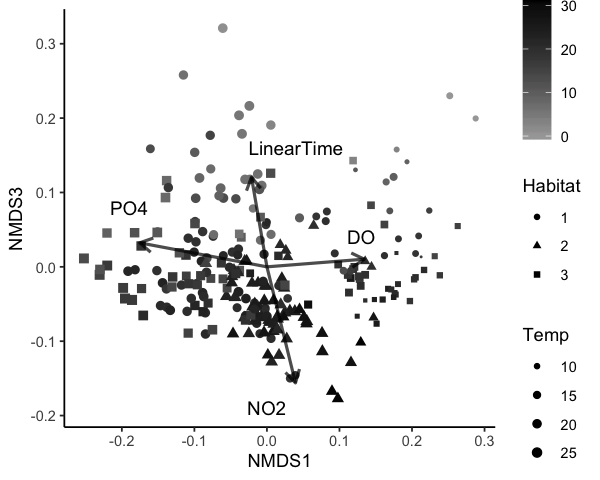

In [31]:
spp.scrs <- as.data.frame(scores(fit.swUF3, display = "vectors"))
spp.scrs <- apply(spp.scrs, MARGIN=2, FUN=function(x) {x*0.5})
spp.scrs
    
sp3 <- ggplot(plot.df.mini, aes(x=NMDS1, y=NMDS3)) + 
              geom_point(aes(color=Salinity, size=Temp, shape=Habitat)) + 
              scale_colour_gradient(low = "#A8A7A7", high = "#000000") + theme_classic() + 
              scale_size(range = c(0.5, 2.5))  + 
              annotate("segment", x = 0, xend = spp.scrs[,'NMDS1'],y = 0, yend = spp.scrs[,'NMDS3'], 
                      alpha=0.7, colour = "black", size=0.9, arrow=arrow(length = unit(0.12, "inches"))) + 
              annotate('text', 
                        x= c(0.13, -0.19, 0, 0.04), 
                        y= c(0.04, 0.08, -0.19, 0.16), 
                        label=c('DO', 'PO4', 'NO2', 'LinearTime'),
                        color='black', alpha=1.0, size=4)
sp3



In [36]:
as.dist(cor(sapply(plot.df.mini, as.numeric)[which(!is.na(plot.df.mini$Salinity)),]))

                NMDS1        NMDS2        NMDS3      Habitat     Salinity
NMDS2     0.003028647                                                    
NMDS3     0.001626523 -0.004475102                                       
Habitat   0.078929223 -0.634556701 -0.271473321                          
Salinity  0.090569826  0.222679577 -0.812928215  0.116362943             
Temp     -0.817141885  0.111496458 -0.098135488 -0.220223656  0.045661112

In [ ]:
comp_orig = env_data_orig[which(!is.na(env_data_orig$DO)), 
                          c('NO2F', 'PO4F', 'DO', 'FallPeak', 'Latitude', 'WTEMP', 'WaterColumnPosition')]
colSums(!is.na(comp_orig))


In [ ]:
library(MASS)
library(sfsmisc)

rr.do <- rlm(DO*-1 ~ Latitude + WTEMP + WaterColumnPosition, data = comp_orig, maxit=200)

summary(rr.do)
f.robftest(rr.do, var = "Latitude")
f.robftest(rr.do, var = "WTEMP")
f.robftest(rr.do, var = "WaterColumnPositionupper")

options(repr.plot.width=6, repr.plot.height=6)
par(mfrow = c(2,2))

plot(comp_orig$Latitude, comp_orig$DO, xlab='Latitude', ylab='DO')
plot(comp_orig$Latitude, rr.do$residuals, xlab='Latitude', ylab='DO residuals')
plot(comp_orig$WTEMP, comp_orig$DO, xlab='WTEMP', ylab='DO')
plot(comp_orig$WTEMP, rr.do$residuals, xlab='WTEMP', ylab='DO residuals')


In [ ]:
rr.no2 <- rlm(NO2F ~ Latitude + FallPeak + WaterColumnPosition, data = comp_orig, maxit=200)

f.robftest(rr.no2, var = "Latitude")
f.robftest(rr.no2, var = "FallPeak")
f.robftest(rr.no2, var = "WaterColumnPositionupper")

options(repr.plot.width=6, repr.plot.height=6)
par(mfrow = c(2,2))
plot(comp_orig$Latitude, comp_orig$NO2F, xlab='Latitude', ylab='NO2F')
plot(comp_orig$Latitude, rr.no2$residuals, xlab='Latitude', ylab='NO2F residuals')
plot(comp_orig$FallPeak, comp_orig$NO2F, xlab='Seasonality', ylab='NO2F')
plot(comp_orig$FallPeak, rr.no2$residuals, xlab='Seasonality', ylab='NO2F')

In [ ]:
rr.po4 <- rlm(PO4F ~ Latitude*FallPeak + WaterColumnPosition, data = comp_orig, maxit=200)
summary(rr.po4)

f.robftest(rr.po4, var = "Latitude")
f.robftest(rr.po4, var = "FallPeak")
f.robftest(rr.po4, var = "Latitude:FallPeak")
f.robftest(rr.po4, var = "WaterColumnPositionupper")

options(repr.plot.width=6, repr.plot.height=6)
par(mfrow = c(2,2))
plot(comp_orig$Latitude, comp_orig$PO4F, xlab='Latitude', ylab='PO4F')
plot(comp_orig$Latitude, rr.po4$residuals, xlab='Latitude', ylab='PO4F residuals')
plot(comp_orig$FallPeak, comp_orig$PO4F, xlab='Seasonality', ylab='PO4F')
plot(comp_orig$FallPeak, rr.po4$residuals, xlab='Seasonality', ylab='PO4F residuals')

In [ ]:
resid_df = cbind(rr.no2$residuals, rr.po4$residuals, rr.do$residuals)
dim(resid_df)
dim(comp_orig)
rownames(resid_df) <- rownames(comp_orig)
colnames(resid_df) <- c('NO2F_residuals', 'PO4F_residuals',  'DO_residuals')
resid_df = as.data.frame(resid_df)

resid_file = paste(env_data_dir, 'environmental_residuals.txt', sep="/")
write.table(resid_df, file=resid_file, sep="\t")

In [ ]:
nti_fn = "../otu_data/dispersal_selection_data/ses_nti.RData"
load(nti_fn)
bnti_df = mntd_scores$comdistnt.obs.z[incl_samps, incl_samps]
bnti_dist = as.dist(bnti_df)

In [ ]:
ps.rarefied = rarefy_even_depth(ps, rngseed=1, sample.size=0.9*min(sample_sums(ps)), replace=F)

In [ ]:
BC.nmds.3D = metaMDS(OTU.clean2, distance="bray", k=3, trymax=1000)

In [ ]:
OTU.UF = otu_table(as.matrix(OTU.clean), taxa_are_rows=FALSE)
tax.UF = tax_table(as.matrix(tax.clean))
meta.UF = sample_data(meta)
wUF.dist = UniFrac(physeq.tree, weighted=TRUE, normalized=TRUE)
BC.nmds

In [ ]:
BC.nmds = metaMDS(OTU.clean, distance="bray", k=2, trymax=1000)
fit.BC = envfit(BC.nmds, meta[,c("AgeGroup", "ADGKG")])
fit.BC.OTU = envfit(BC.nmds, OTU.clean[,1:10])

In [ ]:
adonis(BC.dist ~ AgeGroup*ADGKG, data = meta, permutations = 1000)
adonis(uwUF.dist ~ AgeGroup*ADGKG, data=meta, permutations = 1000)
permutest(disp.age, pairwise=TRUE, permutations=1000)
simper(OTU.clean, meta$AgeGroup, permutations=100)
kruskal.test(OTU.clean$Otu00001 ~ meta$AgeGroup)
#Note: These P-values have not been corrected from false discovery rate (fdr) yet.



In [ ]:

KW.results = data.frame(read.csv("Age_krusk_simper.csv"))
#Remove non-significant
KW.results.signif = KW.results[KW.results$fdr_krusk_p.val < 0.05,]
#Order by OTU#
KW.results.signif = KW.results.signif[with(KW.results.signif, order(OTU)),]
head(KW.results.signif)